In [1]:
import os
import pyspark
import pymongo
from pymongo import MongoClient

conf = pyspark.SparkConf()
# conf.set('spark.ui.proxyBase', '/user/' + 'Nishal Sundarraman' + '/proxy/4040')

client = MongoClient()
db = client.nm4074_BigData
mtaPred = db["mtaPredictions"]

sc = pyspark.SparkContext(conf=conf)
spark = pyspark.sql.SparkSession(sc)
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/09 18:44:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark\
.read\
.option("inferSchema"
, "true")\
.option("header", "true")\
.csv("/Users/avinashvijay/Desktop/NYU/Big Data/project/data/MTA Data/Data/*.csv")

#df.cache()

In [3]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- C/A: string (nullable = true)
 |-- UNIT: string (nullable = true)
 |-- SCP: string (nullable = true)
 |-- STATION: string (nullable = true)
 |-- LINENAME: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- TIME: timestamp (nullable = true)
 |-- DESC: string (nullable = true)
 |-- ENTRIES: integer (nullable = true)
 |-- EXITS                                                               : integer (nullable = true)



In [4]:
from pyspark.sql.functions import split, hour, col


df = df.withColumn("Year", split(df["DATE"], "/")[2].alias("day"))
df = df.withColumn("Day", split(df["DATE"], "/")[1].alias("month"))
df = df.withColumn("Month", split(df["DATE"], "/")[0].alias("year"))
df = df.withColumn('Hour', hour(col('TIME')))

In [5]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

indexer = StringIndexer(inputCol="LINENAME", outputCol="idx_linename")

encoder = OneHotEncoder(inputCol="idx_linename", outputCol="encoded_linename")

pipeline = Pipeline(stages=[indexer, encoder])

encoded_df = pipeline.fit(df).transform(df)

In [7]:
encoded_df.show(10)

+---+----+----+--------+-------+--------+--------+----------+-------------------+-------+-------+--------------------------------------------------------------------+----+---+-----+----+------------+----------------+
|_c0| C/A|UNIT|     SCP|STATION|LINENAME|DIVISION|      DATE|               TIME|   DESC|ENTRIES|EXITS                                                               |Year|Day|Month|Hour|idx_linename|encoded_linename|
+---+----+----+--------+-------+--------+--------+----------+-------------------+-------+-------+--------------------------------------------------------------------+----+---+-----+----+------------+----------------+
|  0|A002|R051|02-00-00|  59 ST| NQR456W|     BMT|01/28/2023|2023-05-08 03:00:00|REGULAR|7823204|                                                             2779648|2023| 28|   01|   3|        87.0|(113,[87],[1.0])|
|  1|A002|R051|02-00-00|  59 ST| NQR456W|     BMT|01/28/2023|2023-05-08 07:00:00|REGULAR|7823209|                                   

In [6]:
encoded_df.select('encoded_linename').distinct().count()

23/05/09 10:29:14 WARN MemoryStore: Not enough space to cache rdd_13_15 in memory! (computed 7.1 MiB so far)
23/05/09 10:29:14 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 7.0 MiB so far)
23/05/09 10:29:14 WARN MemoryStore: Not enough space to cache rdd_13_14 in memory! (computed 7.0 MiB so far)
23/05/09 10:29:14 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 7.1 MiB so far)
23/05/09 10:29:14 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 7.0 MiB so far)
23/05/09 10:29:14 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 7.0 MiB so far)
23/05/09 10:29:14 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 13.8 MiB so far)


23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_19 in memory! (computed 3.6 MiB so far)
23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_23 in memory! (computed 3.6 MiB so far)
23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_20 in memory! (computed 7.0 MiB so far)
23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_22 in memory! (computed 3.6 MiB so far)
23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_21 in memory! (computed 7.1 MiB so far)
23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_16 in memory! (computed 20.7 MiB so far)
23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_17 in memory! (computed 24.1 MiB so far)
23/05/09 10:29:21 WARN MemoryStore: Not enough space to cache rdd_13_18 in memory! (computed 24.2 MiB so far)


23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_30 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_26 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_24 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_29 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_28 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_25 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_31 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:27 WARN MemoryStore: Not enough space to cache rdd_13_27 in memory! (computed 24.0 MiB so far)


23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_32 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_35 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_37 in memory! (computed 13.8 MiB so far)
23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_38 in memory! (computed 24.1 MiB so far)
23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_33 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_39 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_34 in memory! (computed 24.1 MiB so far)
23/05/09 10:29:35 WARN MemoryStore: Not enough space to cache rdd_13_36 in memory! (computed 24.0 MiB so far)


23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_43 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_45 in memory! (computed 24.1 MiB so far)
23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_42 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_44 in memory! (computed 23.9 MiB so far)
23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_46 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_40 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_47 in memory! (computed 24.1 MiB so far)
23/05/09 10:29:44 WARN MemoryStore: Not enough space to cache rdd_13_41 in memory! (computed 24.1 MiB so far)


23/05/09 10:29:52 WARN MemoryStore: Not enough space to cache rdd_13_55 in memory! (computed 14.0 MiB so far)
23/05/09 10:29:52 WARN MemoryStore: Not enough space to cache rdd_13_53 in memory! (computed 23.9 MiB so far)
23/05/09 10:29:52 WARN MemoryStore: Not enough space to cache rdd_13_51 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:52 WARN MemoryStore: Not enough space to cache rdd_13_52 in memory! (computed 24.0 MiB so far)
23/05/09 10:29:52 WARN MemoryStore: Not enough space to cache rdd_13_54 in memory! (computed 24.0 MiB so far)


128

In [7]:
encoded_df.select('LINENAME').distinct().count()

23/05/09 10:30:03 WARN MemoryStore: Not enough space to cache rdd_13_5 in memory! (computed 3.6 MiB so far)
23/05/09 10:30:03 WARN MemoryStore: Not enough space to cache rdd_13_4 in memory! (computed 3.6 MiB so far)
23/05/09 10:30:03 WARN MemoryStore: Not enough space to cache rdd_13_6 in memory! (computed 7.1 MiB so far)
23/05/09 10:30:03 WARN MemoryStore: Not enough space to cache rdd_13_2 in memory! (computed 7.0 MiB so far)
23/05/09 10:30:03 WARN MemoryStore: Not enough space to cache rdd_13_3 in memory! (computed 3.6 MiB so far)


23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_12 in memory! (computed 6.9 MiB so far)
23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 7.1 MiB so far)
23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 7.0 MiB so far)
23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 7.0 MiB so far)
23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_11 in memory! (computed 7.0 MiB so far)
23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 6.9 MiB so far)
23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_14 in memory! (computed 7.0 MiB so far)
23/05/09 10:30:05 WARN MemoryStore: Not enough space to cache rdd_13_15 in memory! (computed 13.8 MiB so far)


23/05/09 10:30:07 WARN MemoryStore: Not enough space to cache rdd_13_19 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:07 WARN MemoryStore: Not enough space to cache rdd_13_22 in memory! (computed 3.6 MiB so far)
23/05/09 10:30:07 WARN MemoryStore: Not enough space to cache rdd_13_21 in memory! (computed 3.6 MiB so far)
23/05/09 10:30:07 WARN MemoryStore: Not enough space to cache rdd_13_18 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:07 WARN MemoryStore: Not enough space to cache rdd_13_17 in memory! (computed 13.9 MiB so far)
23/05/09 10:30:07 WARN MemoryStore: Not enough space to cache rdd_13_23 in memory! (computed 7.1 MiB so far)
23/05/09 10:30:07 WARN MemoryStore: Not enough space to cache rdd_13_16 in memory! (computed 20.7 MiB so far)


23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_24 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_29 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_30 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_28 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_25 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_31 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_26 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:10 WARN MemoryStore: Not enough space to cache rdd_13_27 in memory! (computed 7.0 MiB so far)


23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_36 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_33 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_32 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_35 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_39 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_34 in memory! (computed 13.9 MiB so far)
23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_37 in memory! (computed 24.0 MiB so far)
23/05/09 10:30:12 WARN MemoryStore: Not enough space to cache rdd_13_38 in memory! (computed 24.1 MiB so far)


23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_44 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_42 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_46 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_43 in memory! (computed 24.0 MiB so far)
23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_40 in memory! (computed 24.0 MiB so far)
23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_47 in memory! (computed 24.1 MiB so far)
23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_45 in memory! (computed 24.1 MiB so far)
23/05/09 10:30:14 WARN MemoryStore: Not enough space to cache rdd_13_41 in memory! (computed 24.1 MiB so far)


23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_50 in memory! (computed 13.8 MiB so far)
23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_55 in memory! (computed 24.2 MiB so far)
23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_51 in memory! (computed 24.0 MiB so far)
23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_53 in memory! (computed 23.9 MiB so far)
23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_49 in memory! (computed 24.1 MiB so far)
23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_52 in memory! (computed 24.0 MiB so far)
23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_54 in memory! (computed 24.0 MiB so far)
23/05/09 10:30:16 WARN MemoryStore: Not enough space to cache rdd_13_48 in memory! (computed 24.0 MiB so far)


128

## Linear Regression


In [7]:
from pyspark.sql.functions import *
from pyspark.sql.window import Window


In [8]:
encoded_df = encoded_df.withColumn('dummy', lit(1))
window = Window.partitionBy('dummy').orderBy('C/A', 'UNIT', 'SCP', 'DATE', 'TIME')

encoded_df = encoded_df \
  .withColumn('last_entries', lag('ENTRIES', 1).over(window)) \
  .withColumn('last_exits', lag('EXITS                                                               ', 1).over(window))

encoded_df = encoded_df \
  .withColumn('final_entries', when(encoded_df['ENTRIES'] >= encoded_df['last_entries'], encoded_df['ENTRIES'] - encoded_df['last_entries']).otherwise(encoded_df['ENTRIES'])) \
  .withColumn('final_exits', when(encoded_df['EXITS                                                               '] >= encoded_df['last_exits'], encoded_df['EXITS                                                               '] - encoded_df['last_exits']).otherwise(encoded_df['EXITS                                                               ']))

In [8]:
encoded_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- C/A: string (nullable = true)
 |-- UNIT: string (nullable = true)
 |-- SCP: string (nullable = true)
 |-- STATION: string (nullable = true)
 |-- LINENAME: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- DATE: string (nullable = true)
 |-- TIME: timestamp (nullable = true)
 |-- DESC: string (nullable = true)
 |-- ENTRIES: integer (nullable = true)
 |-- EXITS                                                               : integer (nullable = true)
 |-- Year: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- idx_linename: double (nullable = false)
 |-- encoded_linename: vector (nullable = true)
 |-- dummy: integer (nullable = false)
 |-- last_entries: integer (nullable = true)
 |-- last_exits: integer (nullable = true)
 |-- final_entries: integer (nullable = true)
 |-- final_exits: integer (nullable = true)



In [9]:
encoded_df = encoded_df.withColumn("Day", col("Day").cast("int"))
encoded_df = encoded_df.withColumn("Month", col("Month").cast("int"))
encoded_df = encoded_df.withColumn("Year", col("Year").cast("int"))

In [19]:
print(encoded_df.select('idx_linename').distinct().count())

114


In [10]:
encoded_df = encoded_df.fillna(0)
encoded_df = encoded_df.withColumn('Food Traffic', col('final_entries')+col('final_exits'))

## Corelation Matrix

23/05/09 11:42:25 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:25 WARN MemoryStore: Not enough space to cache rdd_13_15 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:25 WARN MemoryStore: Not enough space to cache rdd_13_14 in memory! (computed 3.5 MiB so far)
23/05/09 11:42:25 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:25 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 7.1 MiB so far)
23/05/09 11:42:25 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 6.9 MiB so far)


23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_23 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_18 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_22 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_19 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_17 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_21 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_16 in memory! (computed 3.6 MiB so far)
23/05/09 11:42:58 WARN MemoryStore: Not enough space to cache rdd_13_20 in memory! (computed 7.0 MiB so far)


23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_24 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_28 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_25 in memory! (computed 3.7 MiB so far)
23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_29 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_27 in memory! (computed 7.0 MiB so far)
23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_26 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_31 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:20 WARN MemoryStore: Not enough space to cache rdd_13_30 in memory! (computed 3.6 MiB so far)


23/05/09 11:43:47 WARN MemoryStore: Not enough space to cache rdd_13_32 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:47 WARN MemoryStore: Not enough space to cache rdd_13_37 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:47 WARN MemoryStore: Not enough space to cache rdd_13_38 in memory! (computed 3.7 MiB so far)
23/05/09 11:43:47 WARN MemoryStore: Not enough space to cache rdd_13_39 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:47 WARN MemoryStore: Not enough space to cache rdd_13_33 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:47 WARN MemoryStore: Not enough space to cache rdd_13_34 in memory! (computed 3.6 MiB so far)
23/05/09 11:43:47 WARN MemoryStore: Not enough space to cache rdd_13_35 in memory! (computed 7.0 MiB so far)


23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_43 in memory! (computed 3.7 MiB so far)
23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_47 in memory! (computed 3.6 MiB so far)
23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_46 in memory! (computed 3.6 MiB so far)
23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_44 in memory! (computed 3.6 MiB so far)
23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_45 in memory! (computed 7.1 MiB so far)
23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_40 in memory! (computed 3.6 MiB so far)
23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_42 in memory! (computed 3.5 MiB so far)
23/05/09 11:44:16 WARN MemoryStore: Not enough space to cache rdd_13_41 in memory! (computed 3.6 MiB so far)


23/05/09 11:44:37 WARN MemoryStore: Not enough space to cache rdd_13_49 in memory! (computed 7.0 MiB so far)
23/05/09 11:44:37 WARN MemoryStore: Not enough space to cache rdd_13_51 in memory! (computed 3.6 MiB so far)
23/05/09 11:44:37 WARN MemoryStore: Not enough space to cache rdd_13_48 in memory! (computed 3.6 MiB so far)
23/05/09 11:44:37 WARN MemoryStore: Not enough space to cache rdd_13_52 in memory! (computed 3.7 MiB so far)
23/05/09 11:44:37 WARN MemoryStore: Not enough space to cache rdd_13_50 in memory! (computed 7.0 MiB so far)
23/05/09 11:44:37 WARN MemoryStore: Not enough space to cache rdd_13_53 in memory! (computed 3.6 MiB so far)
23/05/09 11:44:37 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_13_54 in memory.
23/05/09 11:44:37 WARN MemoryStore: Not enough space to cache rdd_13_54 in memory! (computed 384.0 B so far)
23/05/09 11:44:37 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for comput

23/05/09 11:45:04 WARN MemoryStore: Not enough space to cache rdd_13_56 in memory! (computed 13.8 MiB so far)


23/05/09 11:45:06 WARN MemoryStore: Not enough space to cache rdd_13_60 in memory! (computed 3.7 MiB so far)
23/05/09 11:45:06 WARN MemoryStore: Not enough space to cache rdd_13_57 in memory! (computed 3.5 MiB so far)
23/05/09 11:45:06 WARN MemoryStore: Not enough space to cache rdd_13_58 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:06 WARN MemoryStore: Not enough space to cache rdd_13_59 in memory! (computed 3.6 MiB so far)


23/05/09 11:45:18 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/05/09 11:45:18 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


23/05/09 11:45:35 WARN MemoryStore: Not enough space to cache rdd_13_10 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:35 WARN MemoryStore: Not enough space to cache rdd_13_13 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:35 WARN MemoryStore: Not enough space to cache rdd_13_9 in memory! (computed 7.0 MiB so far)
23/05/09 11:45:35 WARN MemoryStore: Not enough space to cache rdd_13_8 in memory! (computed 6.9 MiB so far)
23/05/09 11:45:35 WARN MemoryStore: Not enough space to cache rdd_13_15 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:35 WARN MemoryStore: Not enough space to cache rdd_13_14 in memory! (computed 3.5 MiB so far)


23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_18 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_23 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_19 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_21 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_16 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_22 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_17 in memory! (computed 3.6 MiB so far)
23/05/09 11:45:59 WARN MemoryStore: Not enough space to cache rdd_13_20 in memory! (computed 7.0 MiB so far)


23/05/09 11:46:21 WARN MemoryStore: Not enough space to cache rdd_13_28 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:21 WARN MemoryStore: Not enough space to cache rdd_13_29 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:21 WARN MemoryStore: Not enough space to cache rdd_13_24 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:21 WARN MemoryStore: Not enough space to cache rdd_13_26 in memory! (computed 7.0 MiB so far)
23/05/09 11:46:21 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_13_30 in memory.
23/05/09 11:46:21 WARN MemoryStore: Not enough space to cache rdd_13_25 in memory! (computed 3.7 MiB so far)
23/05/09 11:46:21 WARN MemoryStore: Not enough space to cache rdd_13_27 in memory! (computed 7.0 MiB so far)
23/05/09 11:46:21 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_13_31 in memory.
23/05/09 11:46:21 WARN MemoryStore: Not enough space to cache rdd_13_30 in mem

23/05/09 11:46:39 WARN MemoryStore: Not enough space to cache rdd_13_37 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:39 WARN MemoryStore: Not enough space to cache rdd_13_35 in memory! (computed 7.0 MiB so far)
23/05/09 11:46:39 WARN MemoryStore: Not enough space to cache rdd_13_32 in memory! (computed 7.0 MiB so far)
23/05/09 11:46:39 WARN MemoryStore: Not enough space to cache rdd_13_34 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:39 WARN MemoryStore: Not enough space to cache rdd_13_33 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:39 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_13_38 in memory.
23/05/09 11:46:39 WARN MemoryStore: Not enough space to cache rdd_13_38 in memory! (computed 384.0 B so far)
23/05/09 11:46:39 WARN MemoryStore: Not enough space to cache rdd_13_39 in memory! (computed 3.6 MiB so far)


23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_46 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_44 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_41 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_47 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_42 in memory! (computed 3.5 MiB so far)
23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_45 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_40 in memory! (computed 3.6 MiB so far)
23/05/09 11:46:59 WARN MemoryStore: Not enough space to cache rdd_13_43 in memory! (computed 7.0 MiB so far)


23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_50 in memory! (computed 3.5 MiB so far)
23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_48 in memory! (computed 3.6 MiB so far)
23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_53 in memory! (computed 3.6 MiB so far)
23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_49 in memory! (computed 3.6 MiB so far)
23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_52 in memory! (computed 3.7 MiB so far)
23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_54 in memory! (computed 6.9 MiB so far)
23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_51 in memory! (computed 3.6 MiB so far)


23/05/09 11:47:14 WARN MemoryStore: Not enough space to cache rdd_13_55 in memory! (computed 3.6 MiB so far)


23/05/09 11:47:36 WARN MemoryStore: Not enough space to cache rdd_13_56 in memory! (computed 13.8 MiB so far)


23/05/09 11:47:37 WARN MemoryStore: Not enough space to cache rdd_13_57 in memory! (computed 3.5 MiB so far)
23/05/09 11:47:37 WARN MemoryStore: Not enough space to cache rdd_13_58 in memory! (computed 3.6 MiB so far)
23/05/09 11:47:38 WARN MemoryStore: Not enough space to cache rdd_13_59 in memory! (computed 3.6 MiB so far)
23/05/09 11:47:38 WARN MemoryStore: Not enough space to cache rdd_13_60 in memory! (computed 3.7 MiB so far)


DenseMatrix([[ 1.00000000e+00,  1.42682754e-02, -8.68141499e-03,
              -4.82107167e-03,  4.61177235e-04],
             [ 1.42682754e-02,  1.00000000e+00, -1.34808951e-01,
              -7.03210967e-03,  8.60040228e-04],
             [-8.68141499e-03, -1.34808951e-01,  1.00000000e+00,
               1.68599635e-03, -5.05945428e-02],
             [-4.82107167e-03, -7.03210967e-03,  1.68599635e-03,
               1.00000000e+00, -1.12056630e-03],
             [ 4.61177235e-04,  8.60040228e-04, -5.05945428e-02,
              -1.12056630e-03,  1.00000000e+00]])


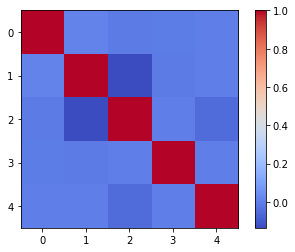

In [13]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour', 'idx_linename'], outputCol="features")
df_vector = assembler.transform(encoded_df)

# compute the correlation matrix
corr_matrix = Correlation.corr(df_vector, 'features').head()[0]

# print the correlation matrix
print(corr_matrix)

import numpy as np
import matplotlib.pyplot as plt

# reshape the correlation matrix as a numpy array
corr_matrix_array = np.array(corr_matrix.toArray())

# plot the correlation matrix
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix_array, cmap='coolwarm')

# add the colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# show the plot
plt.show()

## Linear Regressor

In [13]:
final_df = encoded_df.filter((col('final_entries')<=1000) & (col('final_exits')<=1000) )

## 34th Street Herald Sq

In [14]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour'], outputCol="features")
new_df = final_df.filter(df['STATION'] == '34 ST-HERALD SQ')
new_df = assembler.transform(new_df)

train, test = new_df.randomSplit([0.8, 0.2])

lr = LinearRegression(featuresCol="features", labelCol="Food Traffic")
lr.setRegParam(0.01)
model = lr.fit(train)
predictions = model.transform(test)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Food Traffic", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

print("Coefficients: %s" % str(model.coefficients))
print("Intercept: %s" % str(model.intercept))

message = {'stationName': '34 ST-HERALD SQ', 'x1': model.coefficients[0], 'x2': model.coefficients[1], 'x3': model.coefficients[2], 'x4': model.coefficients[3]}
mtaPred.insert_one(message)


23/05/09 18:48:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 18:48:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 18:48:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 18:48:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 18:49:05 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 18:49:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 18:49:35 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 18:49:35 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 18:49:46 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 18:49:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 18:50:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 18:50:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 18:52:56 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/05/09 18:52:56 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


23/05/09 18:52:56 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
23/05/09 18:52:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 18:52:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                  

23/05/09 18:53:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 18:53:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 18:53:28 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 18:53:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 18:56:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 18:56:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 18:56:28 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 18:56:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 18:56:50 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 18:57:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


Root Mean Squared Error (RMSE) on test data = 310.184
Coefficients: [0.12532990583272624,2.387113269902955,-46.5747575852593,26.474606779331562]
Intercept: 94042.57892860155


## Penn Station


In [15]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour'], outputCol="features")
new_df = final_df.filter(df['STATION'] == '34 ST-PENN STA')
new_df = assembler.transform(new_df)

train, test = new_df.randomSplit([0.8, 0.2])

lr = LinearRegression(featuresCol="features", labelCol="Food Traffic")
lr.setRegParam(0.01)
model = lr.fit(train)
predictions = model.transform(test)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Food Traffic", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

print("Coefficients: %s" % str(model.coefficients))
print("Intercept: %s" % str(model.intercept))

message = {'stationName': '34 ST-PENN STA', 'x1': model.coefficients[0], 'x2': model.coefficients[1], 'x3': model.coefficients[2], 'x4': model.coefficients[3]}
mtaPred.insert_one(message)


23/05/09 18:59:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 18:59:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 18:59:49 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 18:59:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:00:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:00:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:00:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2018.csv
23/05/09 19:00:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:00:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:00:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:01:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:01:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:03:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:03:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:04:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:04:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:04:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:04:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:07:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2018.csv
23/05/09 19:07:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:07:28 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:07:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:07:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:08:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


Root Mean Squared Error (RMSE) on test data = 273.345
Coefficients: [-0.028445231118806154,1.350438785352042,-48.72160804640406,19.886244692811545]
Intercept: 98408.29150290073


## GRD CNTRL-42 ST

In [16]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour'], outputCol="features")
new_df = final_df.filter(df['STATION'] == 'GRD CNTRL-42 ST')
new_df = assembler.transform(new_df)

train, test = new_df.randomSplit([0.8, 0.2])

lr = LinearRegression(featuresCol="features", labelCol="Food Traffic")
lr.setRegParam(0.01)
model = lr.fit(train)
predictions = model.transform(test)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Food Traffic", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

print("Coefficients: %s" % str(model.coefficients))
print("Intercept: %s" % str(model.intercept))

message = {'stationName': 'GRD CNTRL-42 ST', 'x1': model.coefficients[0], 'x2': model.coefficients[1], 'x3': model.coefficients[2], 'x4': model.coefficients[3]}
mtaPred.insert_one(message)


23/05/09 19:10:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2018.csv
23/05/09 19:10:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:10:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:11:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:11:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:11:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:11:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:11:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:11:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:12:04 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:12:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:12:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:15:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2018.csv
23/05/09 19:15:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:15:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:15:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:15:36 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:15:47 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:18:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2018.csv
23/05/09 19:18:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:18:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:18:44 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:18:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:19:04 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


Root Mean Squared Error (RMSE) on test data = 308.988
Coefficients: [-0.182535214829987,-0.24886990367747416,-56.92190371807762,17.523539044046665]
Intercept: 115007.53984680552


## 14 ST-UNION SQ

In [17]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour'], outputCol="features")
new_df = final_df.filter(df['STATION'] == '14 ST-UNION SQ')
new_df = assembler.transform(new_df)

train, test = new_df.randomSplit([0.8, 0.2])

lr = LinearRegression(featuresCol="features", labelCol="Food Traffic")
lr.setRegParam(0.01)
model = lr.fit(train)
predictions = model.transform(test)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Food Traffic", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

print("Coefficients: %s" % str(model.coefficients))
print("Intercept: %s" % str(model.intercept))

message = {'stationName': '14 ST-UNION SQ', 'x1': model.coefficients[0], 'x2': model.coefficients[1], 'x3': model.coefficients[2], 'x4': model.coefficients[3]}
mtaPred.insert_one(message)


23/05/09 19:21:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:21:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:21:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:22:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:22:13 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:22:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:22:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:22:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:22:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:23:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:23:13 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:23:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:26:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:26:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:26:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:26:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:26:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:26:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:29:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2018.csv
23/05/09 19:29:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:29:31 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:29:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:29:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:30:02 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


Root Mean Squared Error (RMSE) on test data = 344.434
Coefficients: [-0.5118582082291449,0.6747620927739875,-61.4850637103951,35.279712879311006]
Intercept: 124140.98185376446


## 23 ST

In [18]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour'], outputCol="features")
new_df = final_df.filter(df['STATION'] == '23 ST')
new_df = assembler.transform(new_df)

train, test = new_df.randomSplit([0.8, 0.2])

lr = LinearRegression(featuresCol="features", labelCol="Food Traffic")
lr.setRegParam(0.01)
model = lr.fit(train)
predictions = model.transform(test)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Food Traffic", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

print("Coefficients: %s" % str(model.coefficients))
print("Intercept: %s" % str(model.intercept))

message = {'stationName': '23 ST', 'x1': model.coefficients[0], 'x2': model.coefficients[1], 'x3': model.coefficients[2], 'x4': model.coefficients[3]}
mtaPred.insert_one(message)


23/05/09 19:32:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:32:41 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:32:51 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:33:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:33:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:33:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:33:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:33:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:33:50 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:34:00 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:34:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:34:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:36:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:36:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:37:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:37:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:37:29 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:37:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


23/05/09 19:40:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2017.csv
23/05/09 19:40:24 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 19:40:35 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 19:40:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 19:40:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 19:41:05 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


Root Mean Squared Error (RMSE) on test data = 275.161
Coefficients: [-0.3290775762626256,-0.7102201463745217,-48.52416259427298,20.25624235710693]
Intercept: 98011.47254883788


## Decision Tree

In [19]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour', 'encoded_linename'], outputCol="features")
new_data = assembler.transform(encoded_df)

# Split data into training and test sets
train_data, test_data = new_data.randomSplit([0.7, 0.3])

# Define model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="final_entries")

# Train model
model = dt.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate model performance
evaluator = RegressionEvaluator(labelCol="final_entries", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)



23/05/07 20:43:41 WARN MemoryStore: Not enough space to cache rdd_139_0 in memory! (computed 153.8 MiB so far)
23/05/07 20:43:41 WARN BlockManager: Persisting block rdd_139_0 to disk instead.
23/05/07 20:43:52 WARN MemoryStore: Not enough space to cache rdd_139_0 in memory! (computed 246.8 MiB so far)


23/05/07 20:44:00 WARN MemoryStore: Not enough space to cache rdd_139_0 in memory! (computed 246.8 MiB so far)


23/05/07 20:44:06 WARN MemoryStore: Not enough space to cache rdd_139_0 in memory! (computed 246.8 MiB so far)


23/05/07 20:44:13 WARN MemoryStore: Not enough space to cache rdd_139_0 in memory! (computed 246.8 MiB so far)


23/05/07 20:44:19 WARN MemoryStore: Not enough space to cache rdd_139_0 in memory! (computed 246.8 MiB so far)


Root Mean Squared Error (RMSE): 127185548.68405624


## No of Records

In [20]:
temp_df = spark\
.read\
.option("inferSchema"
, "true")\
.option("header", "true")\
.csv("/Users/avinashvijay/Desktop/NYU/Big Data/project/data/MTA Data/*.csv")

In [21]:
temp_df.count()

90011832

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Day", "Month", "Year", 'Hour'], outputCol="features")
new_df = encoded_df.filter(df['STATION'] == '23 ST')
new_df = assembler.transform(new_df)

train, test = new_df.randomSplit([0.8, 0.2])

lr = LinearRegression(featuresCol="features", labelCol="Food Traffic")
lr.setRegParam(0.01)
model = lr.fit(train)
predictions = model.transform(test)

from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="Food Traffic", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

print("Coefficients: %s" % str(model.coefficients))
print("Intercept: %s" % str(model.intercept))


In [23]:
encoded_df.show()

23/05/09 17:28:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2018.csv
23/05/09 17:28:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/

23/05/09 17:28:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2019.csv


23/05/09 17:28:35 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2020.csv


23/05/09 17:28:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2021.csv


23/05/09 17:28:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
 Schema: _c0, C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS                                                               
Expected: _c0 but found: 
CSV file: file:///Users/avinashvijay/Desktop/NYU/Big%20Data/project/data/MTA%20Data/Data/2022.csv


+-------+----+----+--------+-------+--------+--------+----------+-------------------+-------+-------+--------------------------------------------------------------------+----+---+-----+----+------------+----------------+-----+------------+----------+-------------+-----------+------------+
|    _c0| C/A|UNIT|     SCP|STATION|LINENAME|DIVISION|      DATE|               TIME|   DESC|ENTRIES|EXITS                                                               |Year|Day|Month|Hour|idx_linename|encoded_linename|dummy|last_entries|last_exits|final_entries|final_exits|Food Traffic|
+-------+----+----+--------+-------+--------+--------+----------+-------------------+-------+-------+--------------------------------------------------------------------+----+---+-----+----+------------+----------------+-----+------------+----------+-------------+-----------+------------+
|5922129|A002|R051|02-00-00|  59 ST| NQR456W|     BMT|01/01/2017|2023-05-09 03:00:00|REGULAR|5992718|                             

In [33]:
df_2023 = spark\
.read\
.option("inferSchema"
, "true")\
.option("header", "true")\
.csv("/Users/avinashvijay/Desktop/NYU/Big Data/project/data/MTA Data/2022.csv")

In [34]:
df_2023.count()

11173582

In [37]:
11173582/114


98013.87719298246